In [34]:
import pandas as pd
import numpy as np
from pathlib import Path

from ipykernel.datapub import publish_data
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import newton

In [35]:
def load_all_data(file_prefix: str, folder: str,  file_extension: str = "csv") -> pd.DataFrame:
    directory = Path(folder)
    csv_files = sorted(directory.glob(f"{file_prefix}*.{file_extension}"))
    if not csv_files:
        raise FileNotFoundError(f"No files matching '{file_prefix}*.{file_extension}' found in {directory.resolve()}")
    dfs = []
    for fp in csv_files:
        match file_extension:
            case "csv":
                df = pd.read_csv(fp)
            case "parquet":
                df = pd.read_parquet(fp)
            case _:
                raise ValueError(f"Unsupported file extension: {file_extension}")
        dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True, sort=False)
    return combined_df.drop_duplicates()

In [95]:
finlight_data = '../data/finlighten_news'

In [111]:
df = load_all_data('articles', finlight_data)

In [112]:
df

,source,title,summary,publishDate,sentiment,confidence,article_id,query
0,www.globenewswire.com,"WISeKey’s WISe.ART 3.0, One of the World’s Fir...",NaN,2025-06-02 05:00:00+00:00,neutral,0.999984,1.748844e+15,crypto
1,www.prnewswire.com,Spoločnosť Bybit získala licenciu MiCAR v Rakú...,"VIEDEŇ, 2. júna 2025 /PRNewswire/ – Bybit, dru...",2025-06-02 04:41:00+00:00,neutral,0.999966,1.748844e+15,crypto
2,www.coindesk.com,Asia Morning Briefing: BTC Stalls at 105K as A...,NaN,2025-06-02 00:22:59+00:00,neutral,0.788036,1.748844e+15,crypto
3,www.bloomberg.com,South Korea Crypto Industry to Gain No Matter ...,No matter who clinches South Korea’s president...,2025-06-01 22:00:00+00:00,neutral,0.890912,1.748844e+15,crypto
4,finance.yahoo.com,XRP (Ripple) Is Down 34%. Should You Buy the Dip?,NaN,2025-06-01 15:03:00+00:00,negative,0.854577,1.748844e+15,crypto
...,...,...,...,...,...,...,...,...
81011,finance.yahoo.com,Thunes unveils new solution to ease business p...,NaN,2025-04-23 11:28:19+00:00,positive,0.843095,1.748587e+15,usd
81012,www.prnewswire.com,Space Cybersecurity Market worth $6.96 billion...,"DELRAY BEACH, Fla., April 23, 2025 /PRNewswire...",2025-04-23 10:55:00+00:00,neutral,0.999988,1.748587e+15,usd
81013,timesofindia.indiatimes.com,"India, US to hold formal talks on bilateral tr...",Indian and US officials have commenced formal ...,2025-04-23 10:43:23+00:00,neutral,0.988653,1.748587e+15,usd
81014,timesofindia.indiatimes.com,Donald Trump’s tariffs: Why it could be a key ...,The U.S. reciprocal tariffs on China are set t...,2025-04-23 06:40:49+00:00,neutral,0.998978,1.748587e+15,usd


In [113]:
df['time'] = pd.to_datetime(df['publishDate'], format='ISO8601')

In [114]:
df = df[df['time'] >= '2025-04-01']

In [118]:
df = df.sort_values('time').drop_duplicates()

In [119]:
df['time_diff'] = df['time'].diff()

In [121]:
df.sort_values('time_diff')

,source,title,summary,publishDate,sentiment,confidence,article_id,query,time,time_diff
61703,www.nytimes.com,SpaceX Puts Humans in Orbit Over Earth’s Poles...,"Chun Wang, a Chinese-born crypto entrepreneur,...",2025-04-01 00:00:00+00:00,neutral,0.999680,1.745332e+15,blockchain,2025-04-01 00:00:00+00:00,0 days 00:00:00
70074,finance.yahoo.com,Ethereum and XRP Are Facing Off in This 1 Key ...,NaN,2025-05-09 09:45:00+00:00,positive,0.929903,1.748239e+15,ethereum,2025-05-09 09:45:00+00:00,0 days 00:00:00
43303,finance.yahoo.com,Ethereum and XRP Are Facing Off in This 1 Key ...,NaN,2025-05-09 09:45:00+00:00,positive,0.929903,1.747634e+15,ethereum,2025-05-09 09:45:00+00:00,0 days 00:00:00
20458,finance.yahoo.com,Ethereum and XRP Are Facing Off in This 1 Key ...,NaN,2025-05-09 09:45:00+00:00,positive,0.929903,1.747126e+15,crypto,2025-05-09 09:45:00+00:00,0 days 00:00:00
10061,finance.yahoo.com,Ethereum and XRP Are Facing Off in This 1 Key ...,NaN,2025-05-09 09:45:00+00:00,positive,0.929903,1.749190e+15,ethereum,2025-05-09 09:45:00+00:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...
25552,www.coindesk.com,Bitcoin's Price Stability at Risk From Potenti...,BTC's stability at risk from a potential bond ...,2025-04-06 08:46:28+00:00,negative,0.999901,1.744746e+15,bitcoin,2025-04-06 08:46:28+00:00,0 days 08:46:28
73849,www.globenewswire.com,eQ PE XVII US has raised USD 168 million,"Press Release28 April 2025, 10:00 am",2025-04-28 07:00:00+00:00,neutral,0.999908,1.748326e+15,usd,2025-04-28 07:00:00+00:00,0 days 09:07:05
44677,www.prnewswire.com,CCTV4 : 20e édition des China Film Huabiao Awards,"BEIJING, 27 avril 2025 /PRNewswire/ -- Les der...",2025-04-27 07:35:00+00:00,neutral,0.825726,1.747634e+15,usd,2025-04-27 07:35:00+00:00,0 days 09:39:24
53595,timesofindia.indiatimes.com,US trade uncertainty to weigh on Asia’s growth...,"<img align=""left"" border=""0"" hspace=""10"" src=""...",2025-04-13 09:42:44+00:00,negative,0.999999,1.747755e+15,usd,2025-04-13 09:42:44+00:00,0 days 09:42:44


In [142]:
btc['volume'].min()

np.float64(10848272553.68808)

In [143]:
new_btc['volume_24h'].max()

np.float64(4230347538.6382594)

In [138]:
new_btc = pd.read_csv('~/downloads/btc-usdt_price_kaiko.csv')

In [141]:
new_btc

,timestamp,open,high,low,close,volume,price,count,volume_usd,volume_24h
date,,,,,,,,,,
2025-04-20 00:00:00,1745107200000,85077.00,85079.38,85059.79,85059.79,10.12087,85069.479901,1897,8.609771e+05,8.609771e+05
2025-04-20 00:05:00,1745107500000,85059.79,85119.00,85050.27,85119.00,8.64878,85067.371250,2595,7.357290e+05,1.596706e+06
2025-04-20 00:10:00,1745107800000,85119.00,85220.00,85118.99,85200.00,184.27706,85192.642518,5063,1.569905e+07,1.729576e+07
2025-04-20 00:15:00,1745108100000,85199.99,85226.42,85170.22,85200.54,11.94444,85207.352005,3579,1.017754e+06,1.831351e+07
2025-04-20 00:20:00,1745108400000,85200.54,85226.42,85200.00,85219.74,14.23802,85213.611400,2213,1.213273e+06,1.952678e+07
...,...,...,...,...,...,...,...,...,...,...
2025-05-10 23:35:00,1746920100000,104437.82,104587.31,104374.03,104550.00,74.51730,104490.337845,22503,7.786338e+06,1.552712e+09
2025-05-10 23:40:00,1746920400000,104550.00,104550.00,104373.34,104384.91,74.35924,104468.906071,17238,7.768228e+06,1.559468e+09
2025-05-10 23:45:00,1746920700000,104384.91,104656.23,104362.11,104596.11,129.08624,104467.417754,16825,1.348531e+07,1.571644e+09


In [140]:
new_btc['date'] = pd.to_datetime(new_btc['date'])
new_btc = new_btc.set_index('date')
new_btc['volume_24h'] = new_btc['volume_usd'].rolling('24h').sum()

In [129]:
new_btc.rolling(pd.Timedelta(hours=24), on='date')['volume'].sum()

ValueError: window must be an integer 0 or greater

In [126]:
md

,timestamp,price,volume,market_cap,symbol
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC
...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC


In [146]:
market_data = "../data/market_data"

In [82]:
md = load_all_data(file_prefix="market_chart", folder=market_data)

In [83]:
btc = md[md['symbol'] == 'BTC']
eth = md[md['symbol'] == 'ETH']
sol = md[md['symbol'] == 'SOL']


In [84]:
def calculate_additional_features(df: pd.DataFrame) -> pd.DataFrame:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values(by='timestamp')
    df['price_shift'] = df['price'].shift(1)
    df['log_return'] = np.log(df['price'] / df['price_shift'])
    df['volatility_4h'] = df['log_return'].rolling(4*12).std()
    df['vwap_4h'] = (df['volume'] * df['price']).rolling(4*12).sum() / df['volume'].rolling(4*12).sum()
    df['volatility_12h'] = df['log_return'].rolling(12*12).std()
    df['vwap_12h'] = (df['volume'] * df['price']).rolling(12*12).sum() / df['volume'].rolling(12*12).sum()
    df['ema_1'] = df['price'].ewm(span=1).mean()
    df['ema_4h'] = df['price'].ewm(halflife='4h', times=df['timestamp']).mean()
    df['ema_30min'] = df['price'].ewm(halflife='30min', times=df['timestamp']).mean()
    return df

In [87]:
btc

,timestamp,price,volume,market_cap,symbol,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC,NaN,NaN,NaN,NaN,NaN,NaN,82204.256642,82204.256642,82204.256642
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562,NaN,NaN,NaN,NaN,82415.160503,82310.420735,82315.400426
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711,NaN,NaN,NaN,NaN,82556.311955,82393.717510,82406.352074
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633,NaN,NaN,NaN,NaN,82691.222763,82469.808683,82491.109798
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452,NaN,NaN,NaN,NaN,82894.269823,82557.281098,82592.245106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206,0.000360,102304.463440,0.000677,101992.069266,102837.348127,102429.732970,102718.904425
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031,0.000360,102324.285645,0.000676,101991.970023,102840.546771,102435.615392,102732.151866
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329,0.000348,102345.752623,0.000676,101992.173516,102874.406897,102441.901450,102747.699175
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352,0.000348,102367.678883,0.000677,101992.826792,102910.606197,102448.622255,102765.618179


In [86]:
btc = calculate_additional_features(btc)
eth = calculate_additional_features(eth)
sol = calculate_additional_features(sol)

/var/folders/17/g4ry6q7j58sflk856bs512vm0000gn/T/ipykernel_60129/527443153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
/var/folders/17/g4ry6q7j58sflk856bs512vm0000gn/T/ipykernel_60129/527443153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
/var/folders/17/g4ry6q7j58sflk856bs512vm0000gn/T/ipykernel_60129/527443153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [47]:
print(len(btc))
print(len(eth))
print(len(sol))

7533
7254
6973


In [67]:
btc

,timestamp,price,volume,market_cap,symbol,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC,NaN,NaN,NaN,NaN,NaN,NaN,82204.256642,82204.256642,82204.256642
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562,NaN,NaN,NaN,NaN,82415.160503,82310.420735,82315.400426
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711,NaN,NaN,NaN,NaN,82556.311955,82393.717510,82406.352074
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633,NaN,NaN,NaN,NaN,82691.222763,82469.808683,82491.109798
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452,NaN,NaN,NaN,NaN,82894.269823,82557.281098,82592.245106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206,0.000360,102304.463440,0.000677,101992.069266,102837.348127,102429.732970,102718.904425
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031,0.000360,102324.285645,0.000676,101991.970023,102840.546771,102435.615392,102732.151866
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329,0.000348,102345.752623,0.000676,101992.173516,102874.406897,102441.901450,102747.699175
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352,0.000348,102367.678883,0.000677,101992.826792,102910.606197,102448.622255,102765.618179


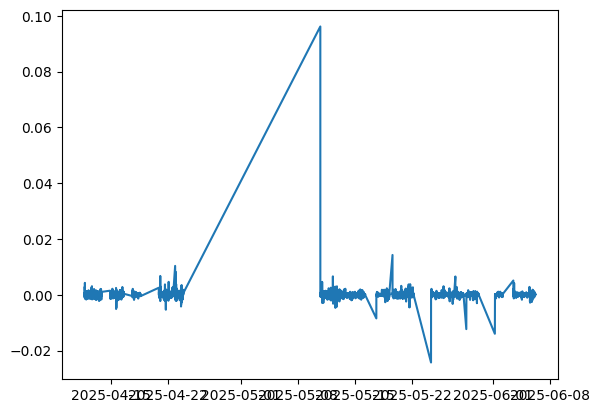

In [88]:
plt.plot(btc["timestamp"], btc["log_return"])

In [92]:
btc['time_diff'] = btc['timestamp'].diff()

In [94]:
btc.sort_values(by="time_diff", ascending=False)

,timestamp,price,volume,market_cap,symbol,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min,time_diff
7428,2025-05-10 17:56:46.472,103345.659361,2.018570e+10,2.053976e+12,BTC,93868.140539,0.096188,0.013891,93784.143425,0.008090,93634.383011,103345.659361,103345.659361,103345.659361,16 days 21:19:54.472000
4857,2025-04-20 20:05:43.793,84682.717452,1.084827e+10,1.680224e+12,BTC,84470.737753,0.002506,0.000460,84577.109128,0.000378,84655.596130,84682.717452,84682.480745,84682.717452,2 days 05:43:58.793000
16889,2025-05-24 09:20:48.436,108307.322860,4.663353e+10,2.151965e+12,BTC,110969.607452,-0.024284,0.003570,111109.079346,0.002190,109685.082850,108307.322860,108324.302863,108307.322860,2 days 02:48:05.436000
22028,2025-06-01 06:06:03.502,104558.862977,1.618032e+10,2.078277e+12,BTC,106031.996225,-0.013991,0.002032,106067.991401,0.001271,106025.793387,104558.862977,104588.891442,104558.862977,1 days 23:33:39.502000
12581,2025-05-17 15:36:01.754,103120.555103,2.095678e+10,2.048589e+12,BTC,103999.179031,-0.008484,0.001241,104030.600760,0.000883,103711.190757,103120.555103,103236.714062,103120.555103,1 days 08:58:50.754000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2025-04-16 12:27:28.000,84176.269424,2.583079e+10,1.669691e+12,BTC,84145.061992,0.000371,0.000529,83883.984317,0.000651,83665.221795,84176.269424,83817.633556,84015.954125,0 days 00:00:53.148000
12787,2025-05-18 09:06:14.129,103979.851290,1.697391e+10,2.065531e+12,BTC,103978.209137,0.000016,0.000348,103644.346197,0.000259,103375.252609,103979.851290,103478.320332,103866.604614,0 days 00:00:48.892000
3430,2025-04-16 12:21:06.000,84057.781246,2.571582e+10,1.668677e+12,BTC,84055.496793,0.000027,0.000700,83859.806497,0.000653,83655.208218,84057.781246,83807.737491,83983.416168,0 days 00:00:34.400000
21297,2025-05-29 17:42:15.729,106728.027934,3.497850e+10,2.121197e+12,BTC,106727.841856,0.000002,0.000645,107188.456327,0.000491,107926.159340,106728.027934,107703.591766,106865.084042,0 days 00:00:26.729000


In [80]:
btc.iloc[7429]

timestamp         2025-06-05 21:30:51.237000
price                          100948.158531
volume                    35747008861.699318
market_cap              2006365739673.025635
symbol                                   BTC
price_shift                    100918.156577
log_return                          0.000297
volatility_4h                       0.000774
vwap_4h                        102220.147136
volatility_12h                      0.000814
vwap_12h                       103746.783355
ema_1                          100948.158531
ema_4h                         103413.611678
ema_30min                      101289.075099
Name: 24812, dtype: object

In [ ]:
2+2


In [20]:
md.dropna()

,timestamp,price,volume,market_cap,symbol,price_shift,log_return
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452
5,2025-04-11 16:56:26.745,82870.781875,3.783755e+10,1.645217e+12,BTC,82894.269823,-0.000283
...,...,...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352


In [145]:
btc

,timestamp,price,volume,market_cap,symbol,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min,time_diff
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC,NaN,NaN,NaN,NaN,NaN,NaN,82204.256642,82204.256642,82204.256642,NaT
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562,NaN,NaN,NaN,NaN,82415.160503,82310.420735,82315.400426,0 days 00:04:40.607000
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711,NaN,NaN,NaN,NaN,82556.311955,82393.717510,82406.352074,0 days 00:06:04.956000
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633,NaN,NaN,NaN,NaN,82691.222763,82469.808683,82491.109798,0 days 00:04:58.681000
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452,NaN,NaN,NaN,NaN,82894.269823,82557.281098,82592.245106,0 days 00:05:06.919000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206,0.000360,102304.463440,0.000677,101992.069266,102837.348127,102429.732970,102718.904425,0 days 00:04:36.047000
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031,0.000360,102324.285645,0.000676,101991.970023,102840.546771,102435.615392,102732.151866,0 days 00:05:28.130000
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329,0.000348,102345.752623,0.000676,101992.173516,102874.406897,102441.901450,102747.699175,0 days 00:05:09.766000
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352,0.000348,102367.678883,0.000677,101992.826792,102910.606197,102448.622255,102765.618179,0 days 00:05:19.269000


In [147]:
long_term = load_all_data("market_chart", market_data)

In [149]:
btc

,timestamp,price,volume,market_cap,symbol,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min,time_diff
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC,NaN,NaN,NaN,NaN,NaN,NaN,82204.256642,82204.256642,82204.256642,NaT
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562,NaN,NaN,NaN,NaN,82415.160503,82310.420735,82315.400426,0 days 00:04:40.607000
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711,NaN,NaN,NaN,NaN,82556.311955,82393.717510,82406.352074,0 days 00:06:04.956000
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633,NaN,NaN,NaN,NaN,82691.222763,82469.808683,82491.109798,0 days 00:04:58.681000
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452,NaN,NaN,NaN,NaN,82894.269823,82557.281098,82592.245106,0 days 00:05:06.919000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24911,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206,0.000360,102304.463440,0.000677,101992.069266,102837.348127,102429.732970,102718.904425,0 days 00:04:36.047000
24912,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031,0.000360,102324.285645,0.000676,101991.970023,102840.546771,102435.615392,102732.151866,0 days 00:05:28.130000
24913,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329,0.000348,102345.752623,0.000676,101992.173516,102874.406897,102441.901450,102747.699175,0 days 00:05:09.766000
24914,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352,0.000348,102367.678883,0.000677,101992.826792,102910.606197,102448.622255,102765.618179,0 days 00:05:19.269000


In [152]:
btc['timestamp'] = pd.to_datetime(btc['timestamp'])

In [153]:
long_term['timestamp'] = pd.to_datetime(long_term['timestamp'])

In [154]:
long_term

,timestamp,price,volume,market_cap,symbol
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC
...,...,...,...,...,...
25766,2025-09-29 18:02:16.226,210.148031,6.790289e+09,1.141625e+11,SOL
25767,2025-09-29 18:05:32.761,210.206197,6.777522e+09,1.142686e+11,SOL
25768,2025-09-29 18:10:39.062,209.915151,6.855245e+09,1.142686e+11,SOL
25769,2025-09-29 18:16:52.162,209.804668,6.848972e+09,1.142686e+11,SOL


In [156]:
btc = btc.sort_values("timestamp")
long_term = long_term.sort_values("timestamp")

In [159]:
df_btc = pd.merge_asof(btc, long_term, on="timestamp", suffixes=("_chart", "_daily"))

In [160]:
df_btc

,timestamp,price_chart,volume_chart,market_cap_chart,symbol_chart,price_shift,log_return,volatility_4h,vwap_4h,volatility_12h,vwap_12h,ema_1,ema_4h,ema_30min,time_diff,timestamop,price_daily,volume_daily,market_cap_daily,symbol_daily
0,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC,NaN,NaN,NaN,NaN,NaN,NaN,82204.256642,82204.256642,82204.256642,NaT,2025-04-11 16:31:05.298,82204.256642,4.052608e+10,1.630439e+12,BTC
1,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC,82204.256642,0.002562,NaN,NaN,NaN,NaN,82415.160503,82310.420735,82315.400426,0 days 00:04:40.607000,2025-04-11 16:35:45.905,82415.160503,4.063195e+10,1.633405e+12,BTC
2,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC,82415.160503,0.001711,NaN,NaN,NaN,NaN,82556.311955,82393.717510,82406.352074,0 days 00:06:04.956000,2025-04-11 16:41:50.861,82556.311955,4.042479e+10,1.638815e+12,BTC
3,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC,82556.311955,0.001633,NaN,NaN,NaN,NaN,82691.222763,82469.808683,82491.109798,0 days 00:04:58.681000,2025-04-11 16:46:49.542,82691.222763,4.046453e+10,1.642054e+12,BTC
4,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC,82691.222763,0.002452,NaN,NaN,NaN,NaN,82894.269823,82557.281098,82592.245106,0 days 00:05:06.919000,2025-04-11 16:51:56.461,82894.269823,3.722561e+10,1.642102e+12,BTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC,102816.195008,0.000206,0.000360,102304.463440,0.000677,101992.069266,102837.348127,102429.732970,102718.904425,0 days 00:04:36.047000,2025-06-06 05:45:08.911,102837.348127,4.329619e+10,2.043468e+12,BTC
7529,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC,102837.348127,0.000031,0.000360,102324.285645,0.000676,101991.970023,102840.546771,102435.615392,102732.151866,0 days 00:05:28.130000,2025-06-06 05:50:37.041,102840.546771,4.324168e+10,2.043966e+12,BTC
7530,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC,102840.546771,0.000329,0.000348,102345.752623,0.000676,101992.173516,102874.406897,102441.901450,102747.699175,0 days 00:05:09.766000,2025-06-06 05:55:46.807,102874.406897,4.297745e+10,2.044211e+12,BTC
7531,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC,102874.406897,0.000352,0.000348,102367.678883,0.000677,101992.826792,102910.606197,102448.622255,102765.618179,0 days 00:05:19.269000,2025-06-06 06:01:06.076,102910.606197,4.298738e+10,2.044736e+12,BTC


In [ ]:
df_btc_selected = df_btc